<a href="https://colab.research.google.com/github/jeromeee2330/Prediction-of-Product-Sales/blob/main/Prediction_of_Product_Sales_PJMCarreon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#PROJECT TITLE: Prediction of Product Sales
- Paul Jerome Carreon

##Product Overview

##Load and Inspect Data



In [1]:
# Mount google drive
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import required packages
fpath = "/content/drive/MyDrive/CodingDojo/01-Fundamentals/Week02/Data/sales_predictions_2023.csv"

# Save the filepath and load the data as "df_titanic"
df_product_sales = pd.read_csv(fpath)

Mounted at /content/drive


In [2]:
df_product_sales.info();
df_product_sales.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052




##Clean Data



In [3]:
# Save a filter called "duplicated_rows" that identifies duplicated rows
duplicated_rows = df_product_sales.duplicated(keep= False)

# Get the sum of duplicated_rows filter to see the number of duplicate rows
duplicated_rows.sum()

0

In [4]:
df_product_sales.nunique()

Item_Identifier              1559
Item_Weight                   415
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [5]:
df_product_sales.nunique() / len(df_product_sales) *100

Item_Identifier              18.291681
Item_Weight                   4.869178
Item_Fat_Content              0.058665
Item_Visibility              92.455708
Item_Type                     0.187727
Item_MRP                     69.670304
Outlet_Identifier             0.117330
Outlet_Establishment_Year     0.105597
Outlet_Size                   0.035199
Outlet_Location_Type          0.035199
Outlet_Type                   0.046932
Item_Outlet_Sales            40.983222
dtype: float64

In [6]:
df_product_sales['Item_Identifier'].value_counts()

FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64

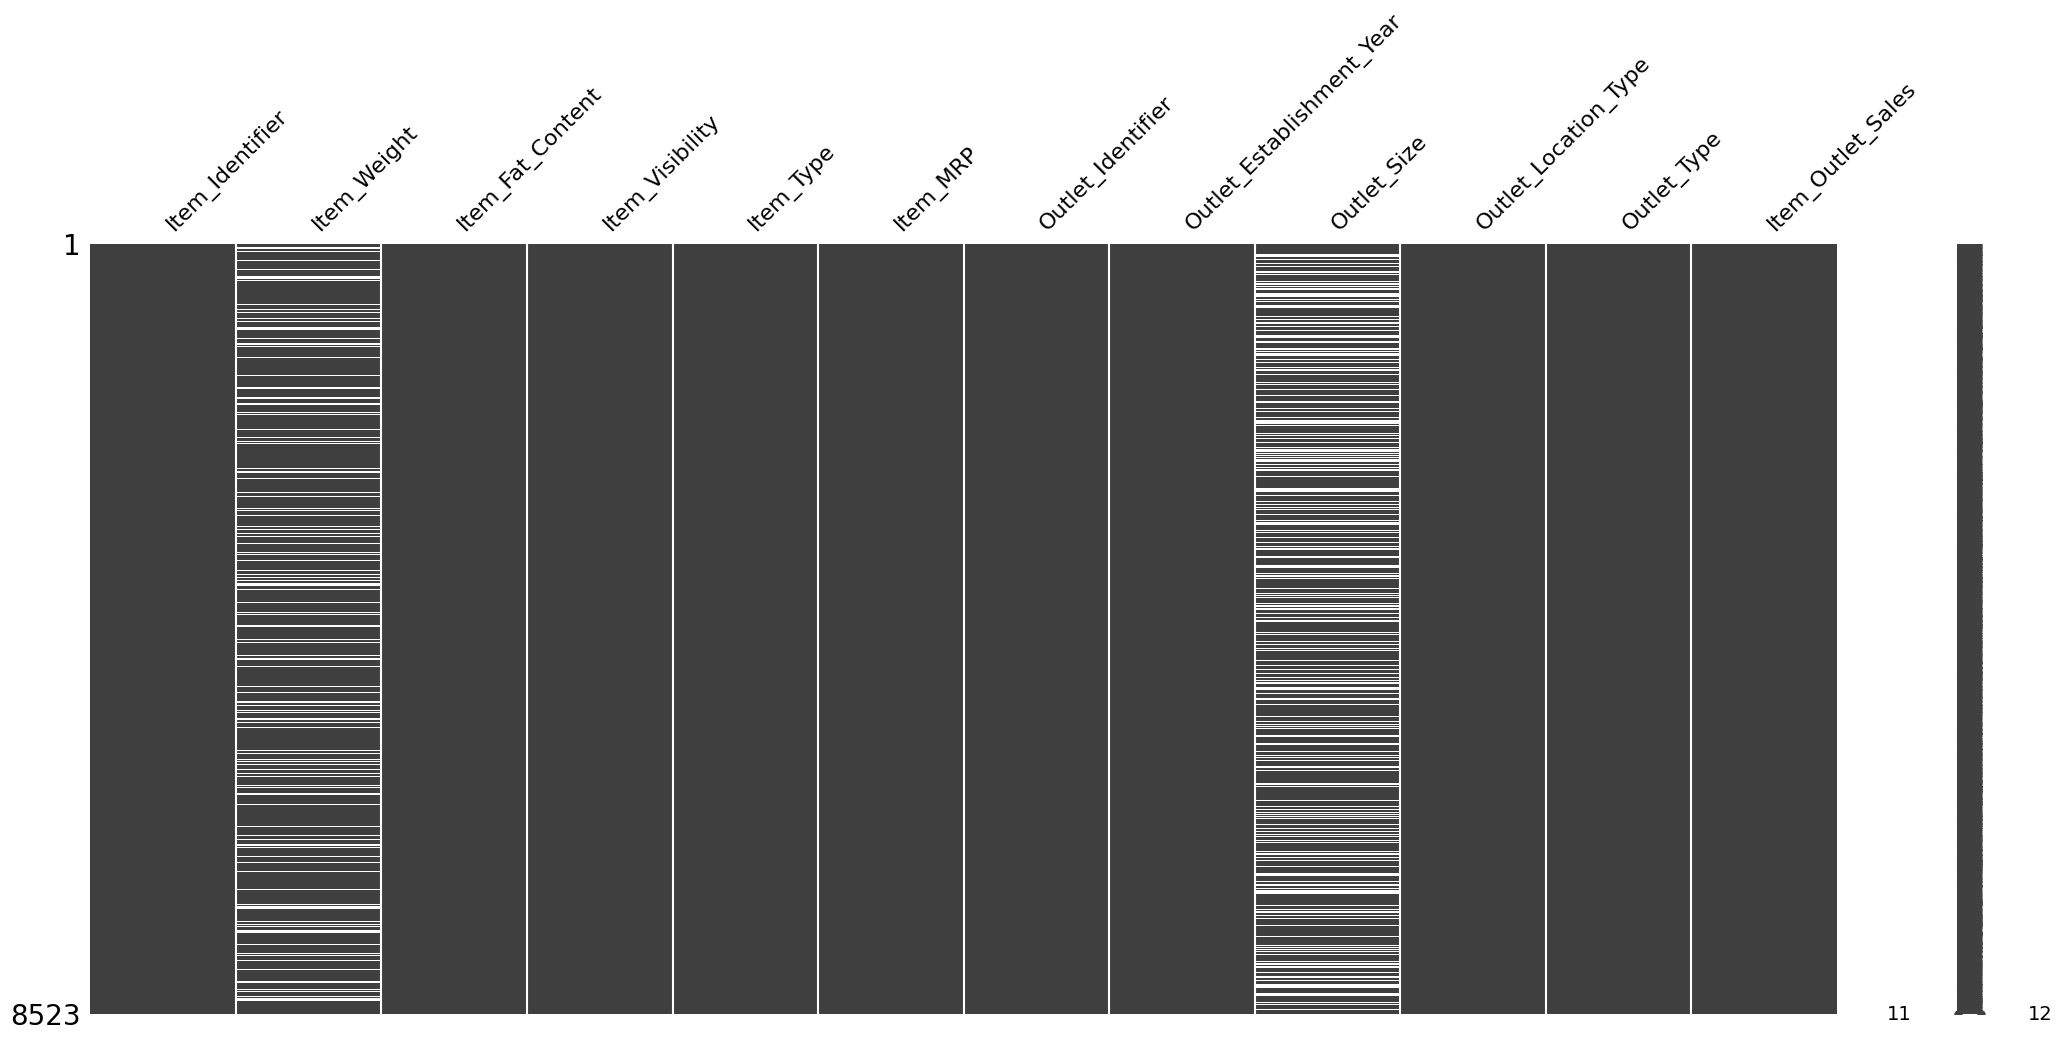

In [7]:
import missingno as msno
msno.matrix(df_product_sales);

In [8]:
# save list of categorical column name. (Hint: select_dtypes)
cat_cols = df_product_sales.select_dtypes('object').columns
cat_cols

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [9]:
# use the list of cat columns to fill null values with MISSING
df_product_sales[cat_cols] = df_product_sales[cat_cols].fillna("MISSING")

In [10]:
# Saving list of column names for numeric cols
num_cols = df_product_sales.select_dtypes('number').columns
num_cols

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

In [11]:
# use the list of num columns to fill null values with -1
df_product_sales[num_cols] = df_product_sales[num_cols].fillna(-1)

In [12]:
# Confirm no more nulls using Pandas
df_product_sales.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

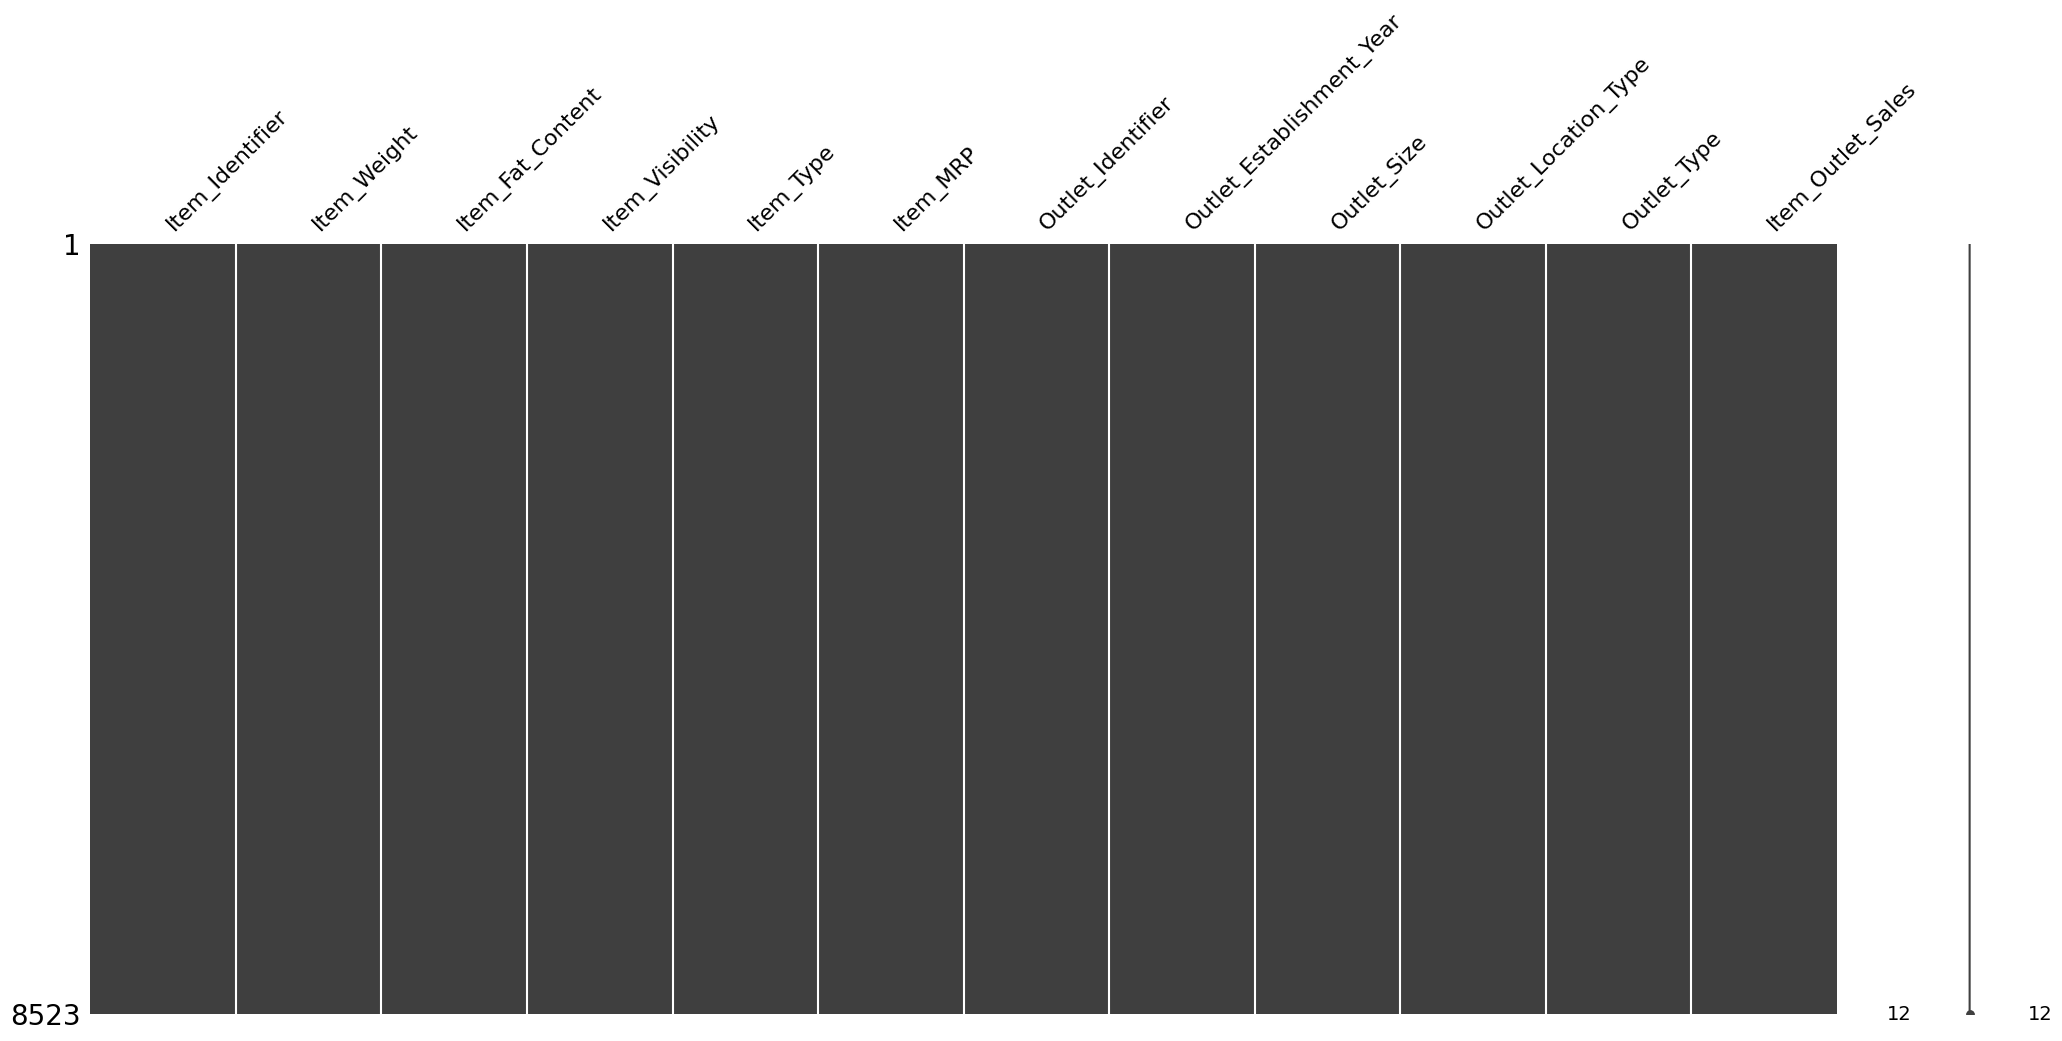

In [13]:
# Confirm no more nulls using using missingno
msno.matrix(df_product_sales);

In [14]:
# Check the nunique for just the object cols
df_product_sales[cat_cols].nunique()

Item_Identifier         1559
Item_Fat_Content           5
Item_Type                 16
Outlet_Identifier         10
Outlet_Size                4
Outlet_Location_Type       3
Outlet_Type                4
dtype: int64

In [15]:
# Remake the list of string columns (after dropping previous cols)
string_cols = df_product_sales.select_dtypes('object').columns
# loop through the list of string columns
  # print the value counts for the column
  # Print an empty line for readability

# Obtain the value counts for all string columns
for col in string_cols:
  print(f"Value Counts for {col}")
  print(df_product_sales[col].value_counts())
  print('\n')

Value Counts for Item_Identifier
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64


Value Counts for Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64


Value Counts for Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64


Value Counts for Outlet_Identifier
OUT027    935
OUT013    932
OUT049    930
OUT046    930


In [16]:
# Replace "LF" with "Low Fat"
df_product_sales['Item_Fat_Content'] = df_product_sales['Item_Fat_Content'].replace({'LF':"Low Fat", 'low fat':"Low Fat", 'reg':"Regular"})


# Check the value counts again to confirm
df_product_sales['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [17]:
df_product_sales[num_cols].describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,10.478936,0.066132,140.992782,1997.831867,2181.288914
std,6.720742,0.051598,62.275067,8.371760,1706.499616
min,-1.000000,0.000000,31.290000,1985.000000,33.290000
25%,6.650000,0.026989,93.826500,1987.000000,834.247400
50%,11.000000,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800



##Exploratory Data Analysis


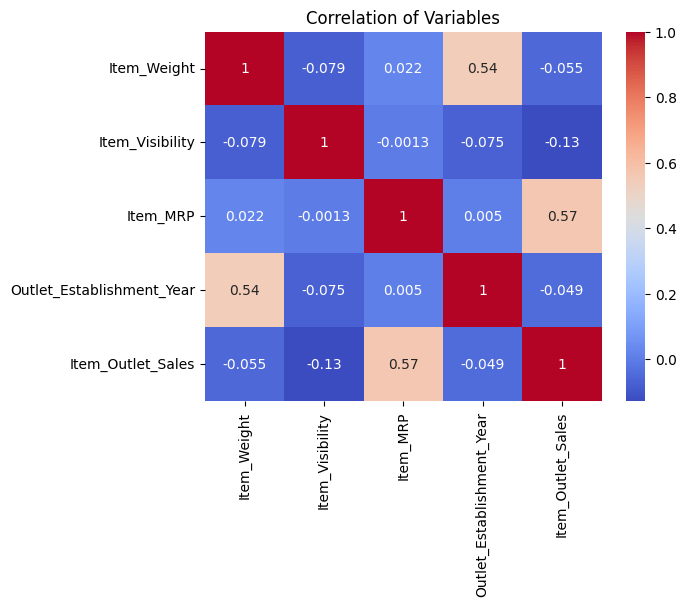

In [18]:
corr = df_product_sales.corr(numeric_only = True)
corr.round(2)
ax = sns.heatmap(corr, cmap = 'coolwarm', annot = True);
ax.set_title("Correlation of Variables");

We can see that there is a strong correlation between the maximum retail price with item outlet sales.

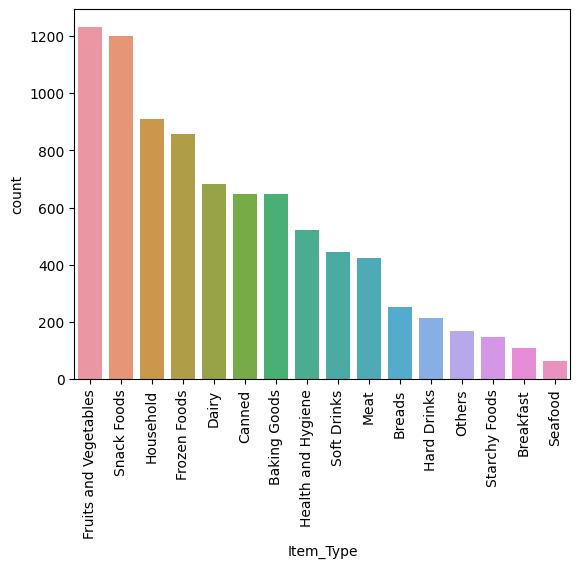

In [19]:
ax = sns.countplot(data=df_product_sales, x='Item_Type', order=df_product_sales['Item_Type'].value_counts().index);
ax.tick_params(axis='x', rotation = 90);

As the data suggest, most of the items that were sold were fruits and vegetables followed closely by snack foods.

In [20]:
means = df_product_sales.groupby('Item_Type')['Item_MRP'].mean().sort_values(ascending=False)
means

Item_Type
Household                149.424753
Dairy                    148.499208
Starchy Foods            147.838023
Snack Foods              146.194934
Fruits and Vegetables    144.581235
Seafood                  141.841719
Breakfast                141.788151
Breads                   140.952669
Meat                     139.882032
Canned                   139.763832
Frozen Foods             138.503366
Hard Drinks              137.077928
Others                   132.851430
Soft Drinks              131.492506
Health and Hygiene       130.818921
Baking Goods             126.380766
Name: Item_MRP, dtype: float64

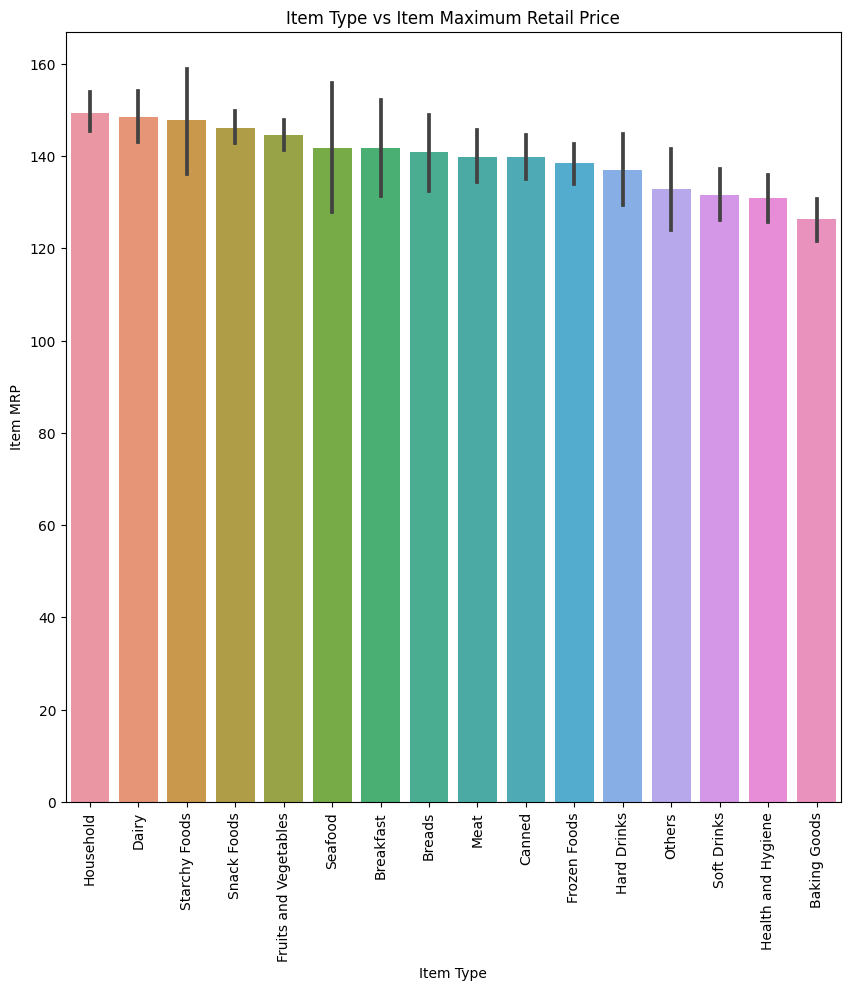

In [21]:
#barplot to explore charges
fig, ax = plt.subplots(figsize=(10,10))
ax = sns.barplot(data=df_product_sales, x='Item_Type', y='Item_MRP', order=means.index);
ax.tick_params(axis='x', rotation = 90);
plt.xlabel("Item Type");
plt.ylabel("Item MRP");
plt.title("Item Type vs Item Maximum Retail Price");

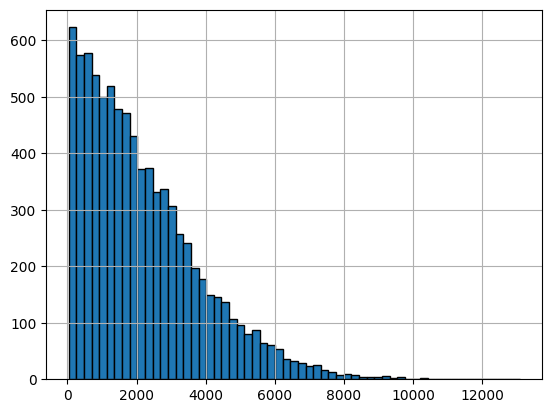

In [39]:
#Histogram for the amount of sales
df_product_sales['Item_Outlet_Sales'].hist(bins = 'auto', edgecolor='black');
ax.set_title('Distribution of Item Outlet Sales');
ax.set_xlabel('Price ($)');
ax.set_ylabel('Number of Sales');

In [22]:
means_sales = df_product_sales.groupby('Item_Type')['Item_Outlet_Sales'].mean().sort_values(ascending=False)

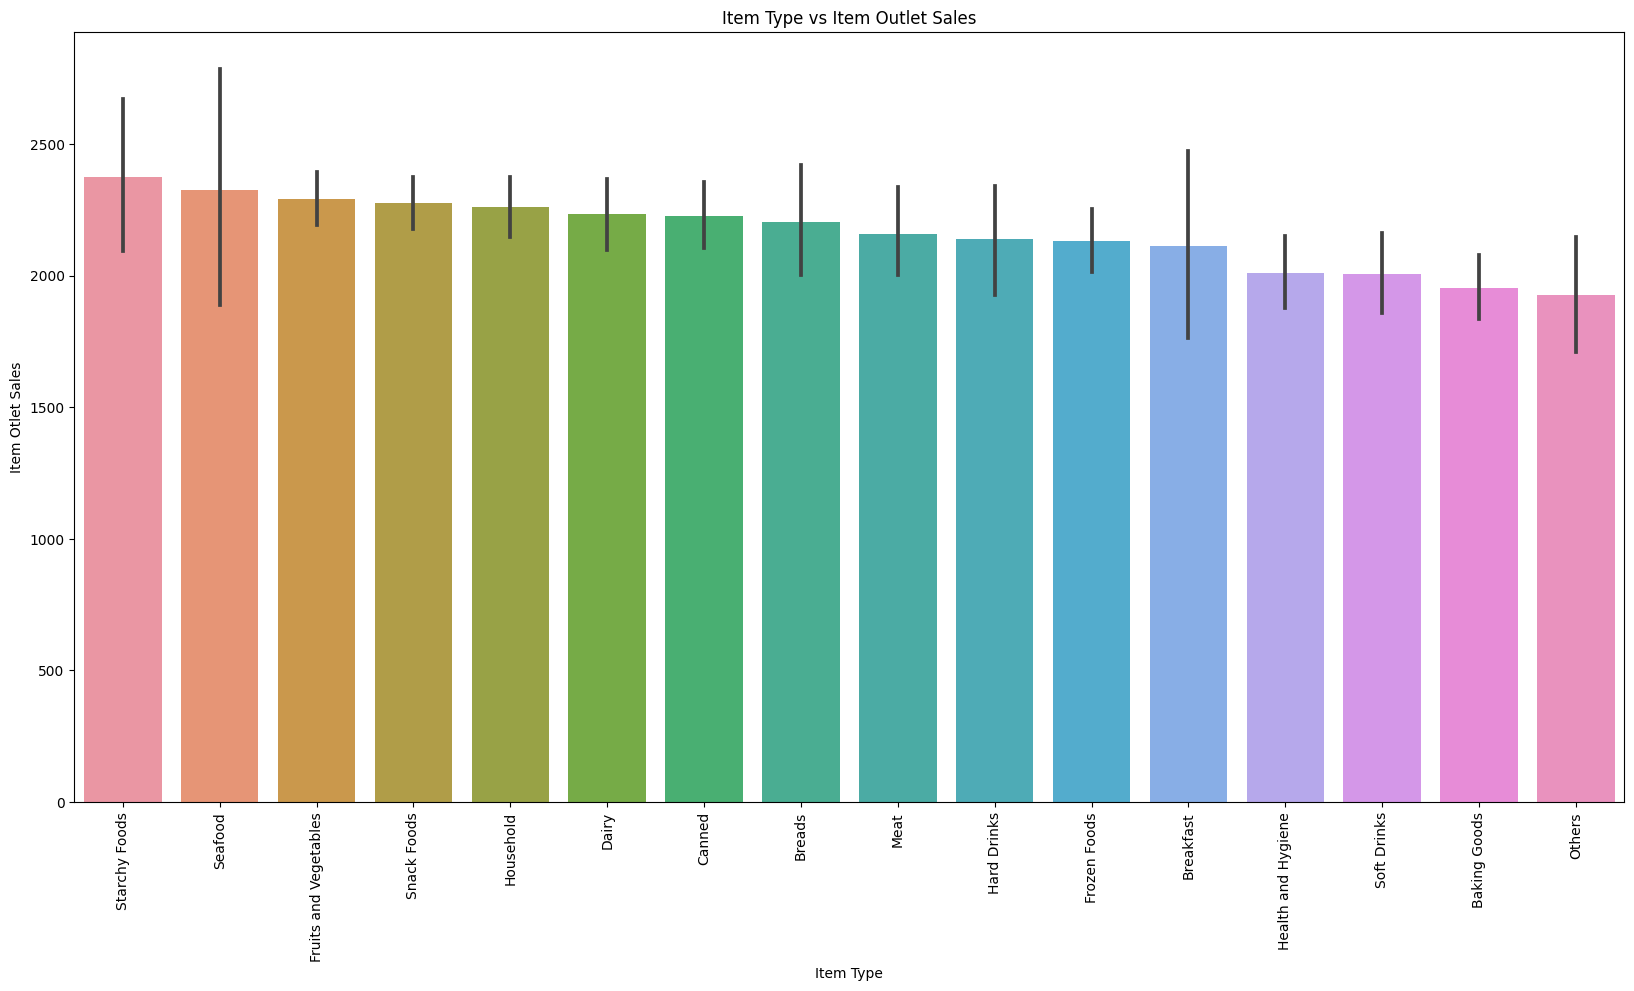

In [23]:
#barplot to explore charges
fig, ax = plt.subplots(figsize=(20,10))
ax = sns.barplot(data=df_product_sales, x='Item_Type', y='Item_Outlet_Sales', order=means_sales.index);
ax.tick_params(axis='x', rotation = 90);
plt.xlabel("Item Type");
plt.ylabel("Item Otlet Sales");
plt.title("Item Type vs Item Outlet Sales");

Compare Price for MRP

In [29]:
Item_sales = df_product_sales.groupby('Item_Type').mean()[['Item_Outlet_Sales','Item_MRP']];
Item_sales.head();

<ipython-input-29-248ebe3232a9>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Item_sales = df_product_sales.groupby('Item_Type').mean()[['Item_Outlet_Sales','Item_MRP']];


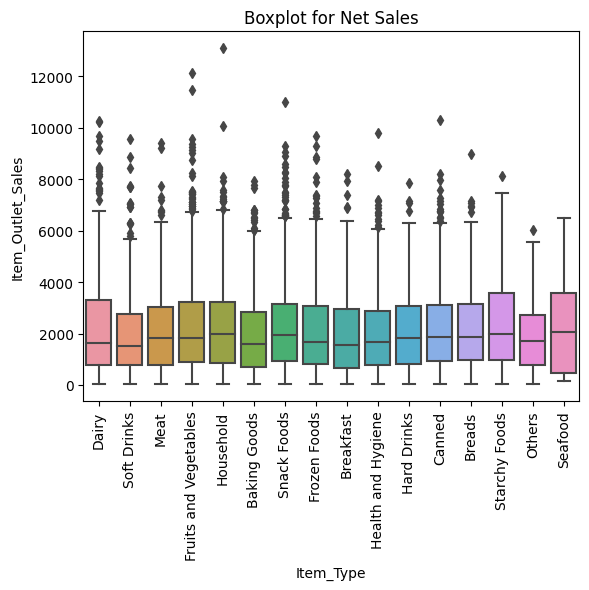

In [28]:
ax = sns.boxplot(data=df_product_sales, x="Item_Type", y="Item_Outlet_Sales")
ax.set_title("Boxplot for Net Sales");
ax.tick_params(axis='x', rotation = 90);


##Feature Inspection